# Hypothesis Testing

# Table of Contents

* [Load Modules](#setup)
* [Load Data](#loaddata)
* [Hypothesis Testing](#hypothesistesting)
 * [Chi-square Test for Independence: Party Affiliation vs Ballots Status](#partyvsrejected)
 * [Hypothesis Testing for Two-Sample Proportions](#proportions)
 * [Mail-in Ballot Rejected Rate vs Party<a class="anchor" id="partyrejectionprop"></a>


<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## Load Modules<a class="anchor" id="setup"></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.stats import chi2_contingency

mpl.rcParams['font.size'] = 12.0
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## Load Data<a  class="anchor" id="loaddata"></a>

In [9]:
ballots_dataset = pd.read_csv('./clean_VBM_before_separation.csv')
ballots_dataset.drop(columns='Unnamed: 0', inplace=True)

In [17]:
# replace group received ballots under accepted ballots
ballots_dataset.ballot_status = ballots_dataset.ballot_status.str.replace('Received','Accepted')

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## Hypothesis Testing<a class="anchor" id="hypothesistesting"></a>

<hr style="height:1px;width:100px;text-align:left;margin-left:0">

### Chi-square Test for Independence: Party Affiliation vs Ballots Status<a class="anchor" id="partyvsrejected"></a>

#### Chi-square (χ2) test for independence (Pearson Chi-square test)
<strong>Hypotheses</strong><br>
Null hypotheses: The two categorical variables are independent (no association between the two variables) ( $H_{0}$&emsp;:&emsp;$O_{i} = E_{i}$ )<br>
Alternative hypotheses: The two categorical variables are not independent (there is an association between the two variables) ( $H_{1}$&emsp;:&emsp;$O_{i} \neq E_{i}$ )<br>
<br>
<strong>Assumptions</strong><br>
1. The two variables are categorical (nominal) and data is randomly sampled<br>
2. The levels of variables are mutually exclusive<br>
3. The expected frequency count for at least 80% of the cell in a contingency table is at least 5<br>
4. The expected frequency count should not be less than 1<br>
5. Observations should be independent of each other<br>
6. Observation data should be frequency counts and not percentages or transformed data<br>

In [63]:
# create crosstab table
data_crosstab = pd.crosstab(ballots_dataset['ballot_vtr_party'], ballots_dataset['ballot_status'], margins = False)
data_crosstab.T

ballot_vtr_party,Conservative Party,Democratic,Green Party,Libertarian,Natural Law Party,Reform Party,Republican,Socialist Party,U.S. Constitution Party,Unaffiliated
ballot_status,,,,,,,,,,
Accepted,8142,1777234,5594,10199,2743,825,1109512,3032,7364,1393159
Rejected,224,18376,133,224,95,32,10178,103,240,20927


In [55]:
# chi-square test for independence
g, p, dof, expctd = chi2_contingency(data_crosstab)
print('p-value -> {}'.format(p), ' < 0.05, we reject the null hypothesis. The two categorical variables are dependent.')

p-value -> 0.0  < 0.05, we reject the null hypothesis. The two categorical variables are dependent.


This means that party affiliation does affect the ballot rejection rate, indicating the ballots rejection rate for each party are statistically signicant.

<hr style="height:1px;width:100px;text-align:left;margin-left:0">

### Hypothesis Testing for Two-Sample Proportions: Democracts vs Republicans<a class="anchor" id="proportions"></a>

Assumptions:<br>
* The data are simple random values from both the populations
* Both populations follows a binomial distribution
* When both mean (np) and variance( n(1-p)) values are greater than 10, the binomial distribution can be approximated by the normal distribution
<br><br>
Null Hypothesis&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $H_{0}$: $p_{0} = p_{1}$<br>
Alternative Hypothesis &emsp;&emsp;$H_{1}$: $p_{0} \neq p_{1}$

In [58]:
from statsmodels.stats.proportion import proportions_ztest, proportions_chisquare
import scipy.stats as stats
count = np.array([data_crosstab.loc['Democratic','Rejected'], data_crosstab.loc['Republican','Rejected']])
nobs = np.array([data_crosstab.loc['Democratic',:].sum(), data_crosstab.loc['Republican',:].sum()])
stat, pval = proportions_ztest(count, nobs)
chi2stat, p_value, expected_table = proportions_chisquare(count, nobs)
print('P-value = {}'.format(pval),' < 0.05, we reject the null hypothesis.\n\
This means that the probability the ballot is rejected depends if the voter is a Democrats or Republicans, \nthat is, it is not the same for both parties.')

P-value = 5.140129872709784e-22  < 0.05, we reject the null hypothesis.
This means that the probability the ballot is rejected depends if the voter is a Democrats or Republicans, 
that is, it is not the same for both parties.


In [62]:
expected_table

(array([[  18376, 1777234],
        [  10178, 1109512]]),
 array([[  17587.16013446, 1778022.83986554],
        [  10966.83986554, 1108723.16013446]]))

<hr style="height:1px;width:100px;text-align:left;margin-left:0">

### Mail-in Ballot Rejected Rate vs Party<a class="anchor" id="partyrejectionprop"></a>

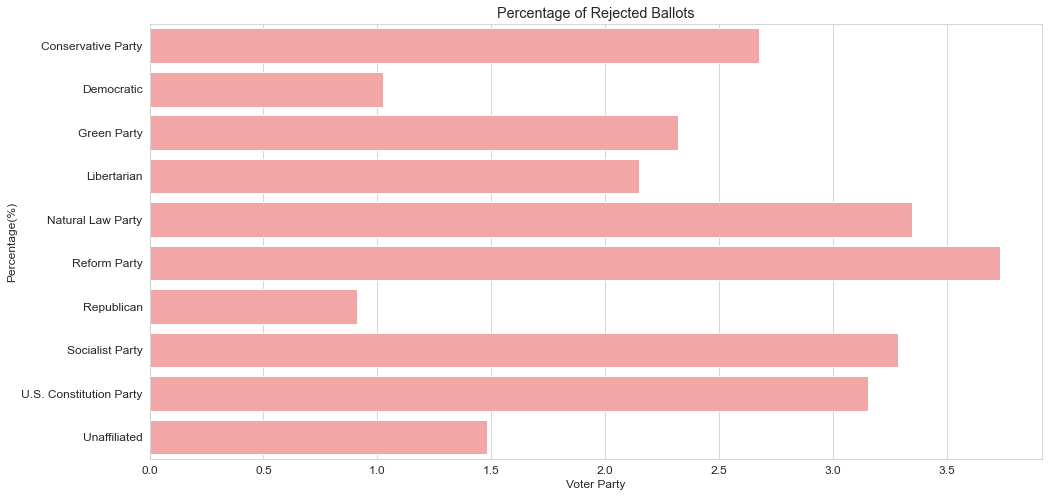

In [61]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(x=0, y='ballot_vtr_party', data=pd.DataFrame(data_crosstab['Rejected'] / data_crosstab.sum(axis=1)*100).reset_index(), color='#ff9999' ,ax = ax)
plot_var = ax.set(xlabel='Voter Party', ylabel='Percentage(%)', title="Percentage of Rejected Ballots")